# Modified KMeans

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to extract patches from an image
def extract_patches(image):
    patches = []
    for i in range(0, image.shape[0] - 6, 1):
        for j in range(0, image.shape[1] - 6, 1):
            patch = image[i:i+7, j:j+7]
            patches.append(patch)
    return patches

# Function to compute feature vector for a patch
def compute_feature_vector(patch):
    mean_intensity = np.mean(patch)
    variance_intensity = np.var(patch)
    return [mean_intensity, variance_intensity]

# Function to initialize centroids randomly
def initialize_centroids(data, k):
    centroids_indices = np.random.choice(len(data), size=k, replace=False)
    centroids = data[centroids_indices]
    return centroids

# Function to assign data points to nearest centroid
def assign_to_centroids(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

# Function to update centroids based on median of assigned data points
def update_centroids_median(data, labels, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_data = data[labels == i]
        if len(cluster_data) > 0:
            centroids[i] = np.median(cluster_data, axis=0)
    return centroids

# Function to perform Modified K-means clustering
def modified_kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        labels = assign_to_centroids(data, centroids)
        new_centroids = update_centroids_median(data, labels, k)
        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids



In [15]:
# Paths
train_folder = '/content/drive/MyDrive/SceneData/cellData/Train'
test_folder = '/content/drive/MyDrive/SceneData/cellData/Test'

# Process training images
training_feature_vectors = []
image_paths = [os.path.join(train_folder, img) for img in os.listdir(train_folder)]
for image_path in image_paths:
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            patches = extract_patches(image)
            for patch in patches:
                feature_vector = compute_feature_vector(patch)
                training_feature_vectors.append(feature_vector)
        else:
            print(f"Error loading image: {image_path}")
    except Exception as e:
        print(f"Error processing image: {image_path} - {str(e)}")

training_feature_vectors = np.array(training_feature_vectors)

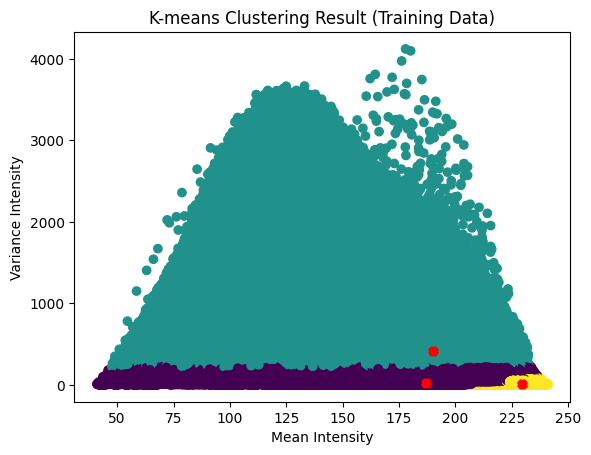

In [16]:
# Perform Modified K-means clustering on training data
k = 3
labels, centroids = modified_kmeans(training_feature_vectors, k)

# Visualize clusters in training data
plt.scatter(training_feature_vectors[:, 0], training_feature_vectors[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=20, linewidths=3, color='r')
plt.title('K-means Clustering Result (Training Data)')
plt.xlabel('Mean Intensity')
plt.ylabel('Variance Intensity')
plt.show()


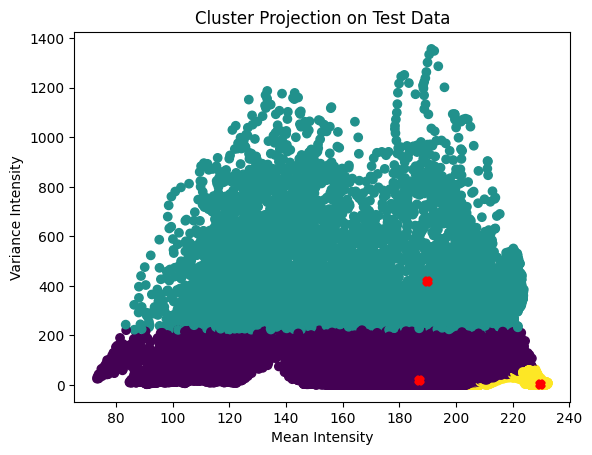

In [17]:
# Process test images
test_feature_vectors = []
test_image_paths = [os.path.join(test_folder, img) for img in os.listdir(test_folder)]
for test_image_path in test_image_paths:
    try:
        test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
        if test_image is not None:
            patches = extract_patches(test_image)
            for patch in patches:
                feature_vector = compute_feature_vector(patch)
                test_feature_vectors.append(feature_vector)
        else:
            print(f"Error loading test image: {test_image_path}")
    except Exception as e:
        print(f"Error processing test image: {test_image_path} - {str(e)}")

test_feature_vectors = np.array(test_feature_vectors)

# Assign test feature vectors to clusters
test_labels = assign_to_centroids(test_feature_vectors, centroids)

# Visualize clusters projected on test data
plt.scatter(test_feature_vectors[:, 0], test_feature_vectors[:, 1], c=test_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=20, linewidths=3, color='r')
plt.title('Cluster Projection on Test Data')
plt.xlabel('Mean Intensity')
plt.ylabel('Variance Intensity')
plt.show()

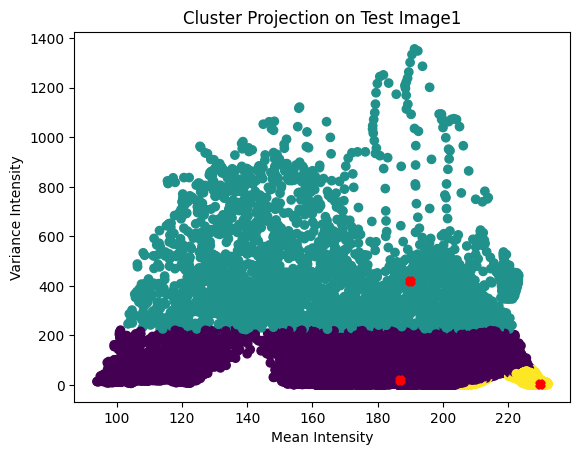

In [18]:
# loaded test feature vectors from test images
test_feature_vectors = np.load('/content/drive/MyDrive/SceneData/cellData/test_feature_vectors_0.npy')

# Assign test feature vectors to clusters
test_labels = assign_to_centroids(test_feature_vectors, centroids)

# Visualize clusters projected on test Image1
plt.scatter(test_feature_vectors[:, 0], test_feature_vectors[:, 1], c=test_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=20, linewidths=3, color='r')
plt.title('Cluster Projection on Test Image1')
plt.xlabel('Mean Intensity')
plt.ylabel('Variance Intensity')
plt.show()


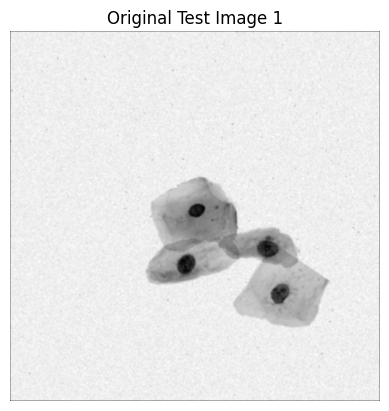

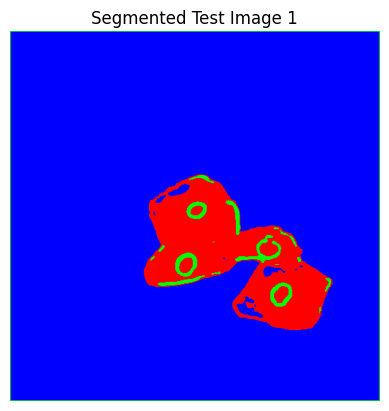

In [19]:
# Define cluster colors (for example, red, green, and blue)
cluster_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

# Load Test Image 1
test_image_path1 = '/content/drive/MyDrive/SceneData/cellData/Test/57.png'
test_image1 = cv2.imread(test_image_path1, cv2.IMREAD_GRAYSCALE)

# Overlay segmentation results onto Test Image 1 with cluster colors
segmented_image = np.zeros((test_image1.shape[0]-6, test_image1.shape[1]-6, 3), dtype=np.uint8)
for i, label in enumerate(test_labels):
    x = i % (test_image1.shape[1] - 6)
    y = i // (test_image1.shape[1] - 6)
    color = cluster_colors[label]
    segmented_image[y:y+7, x:x+7] = color

# Display original Test Image 1
plt.imshow(test_image1, cmap='gray')
plt.title('Original Test Image 1')
plt.axis('off')
plt.show()

# Display segmented Test Image 1
plt.imshow(segmented_image)
plt.title('Segmented Test Image 1')
plt.axis('off')
plt.show()


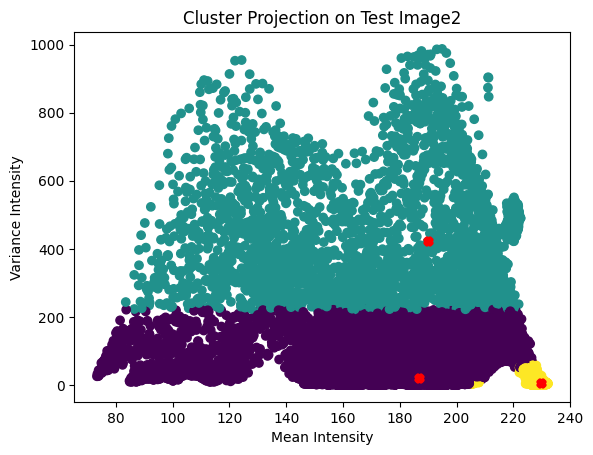

In [20]:


#  loaded test feature vectors from test images
test_feature_vectors = np.load('/content/drive/MyDrive/SceneData/cellData/test_feature_vectors_1.npy')

# Assign test feature vectors to clusters
test_labels = assign_to_centroids(test_feature_vectors, centroids)

# Visualize clusters projected on test Image2
plt.scatter(test_feature_vectors[:, 0], test_feature_vectors[:, 1], c=test_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=20, linewidths=3, color='r')
plt.title('Cluster Projection on Test Image2')
plt.xlabel('Mean Intensity')
plt.ylabel('Variance Intensity')
plt.show()


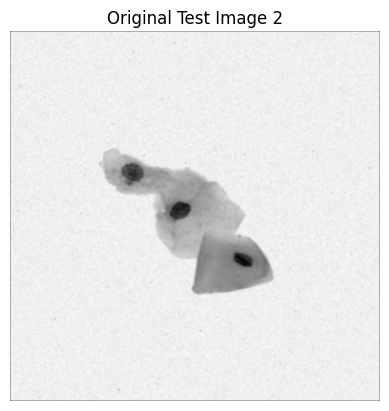

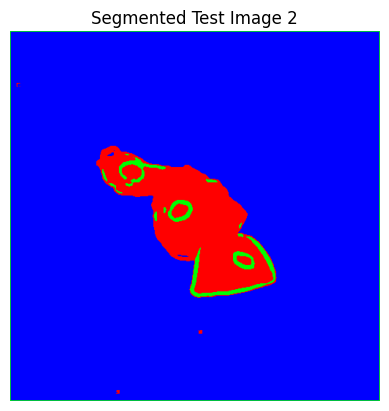

In [21]:
# Define cluster colors (for example, red, green, and blue)
cluster_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

# Load Test Image 1
test_image_path1 = '/content/drive/MyDrive/SceneData/cellData/Test/52.png'
test_image1 = cv2.imread(test_image_path1, cv2.IMREAD_GRAYSCALE)

# Overlay segmentation results onto Test Image 2 with cluster colors
segmented_image = np.zeros((test_image1.shape[0]-6, test_image1.shape[1]-6, 3), dtype=np.uint8)
for i, label in enumerate(test_labels):
    x = i % (test_image1.shape[1] - 6)
    y = i // (test_image1.shape[1] - 6)
    color = cluster_colors[label]
    segmented_image[y:y+7, x:x+7] = color

# Display original Test Image 2
plt.imshow(test_image1, cmap='gray')
plt.title('Original Test Image 2')
plt.axis('off')
plt.show()

# Display segmented Test Image 2
plt.imshow(segmented_image)
plt.title('Segmented Test Image 2')
plt.axis('off')
plt.show()


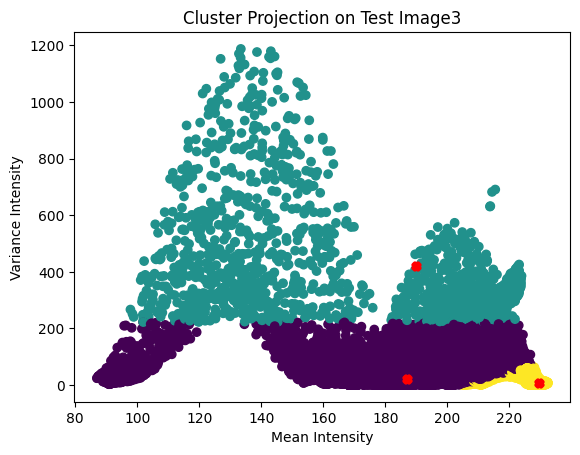

In [22]:
# Assume you have loaded test feature vectors from test images
test_feature_vectors = np.load('/content/drive/MyDrive/SceneData/cellData/test_feature_vectors_2.npy')

# Assign test feature vectors to clusters
test_labels = assign_to_centroids(test_feature_vectors, centroids)

# Visualize clusters projected on test Image3
plt.scatter(test_feature_vectors[:, 0], test_feature_vectors[:, 1], c=test_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=20, linewidths=3, color='r')
plt.title('Cluster Projection on Test Image3')
plt.xlabel('Mean Intensity')
plt.ylabel('Variance Intensity')
plt.show()


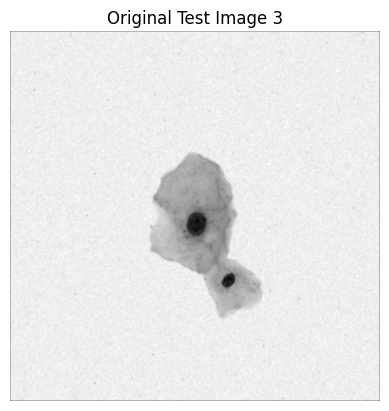

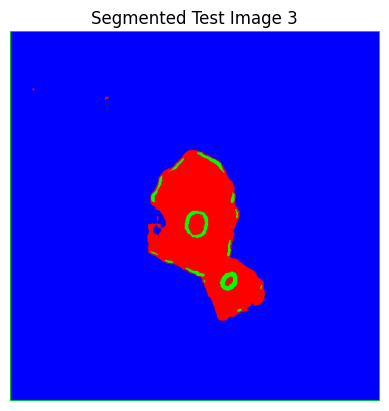

In [23]:
# Define cluster colors (for example, red, green, and blue)
cluster_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

# Load Test Image 3
test_image_path1 = '/content/drive/MyDrive/SceneData/cellData/Test/92.png'
test_image1 = cv2.imread(test_image_path1, cv2.IMREAD_GRAYSCALE)

# Overlay segmentation results onto Test Image 3 with cluster colors
segmented_image = np.zeros((test_image1.shape[0]-6, test_image1.shape[1]-6, 3), dtype=np.uint8)
for i, label in enumerate(test_labels):
    x = i % (test_image1.shape[1] - 6)
    y = i // (test_image1.shape[1] - 6)
    color = cluster_colors[label]
    segmented_image[y:y+7, x:x+7] = color

# Display original Test Image3
plt.imshow(test_image1, cmap='gray')
plt.title('Original Test Image 3')
plt.axis('off')
plt.show()

# Display segmented Test Image 3
plt.imshow(segmented_image)
plt.title('Segmented Test Image 3')
plt.axis('off')
plt.show()
